# Investigation into the effect of Viscosity on gravity driven fluid oscillation in a straw

In [2]:
#importing all using libraries
import numpy as np
import scipy as sp
from ipywidgets import interact
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib widget
%matplotlib inline

By exporting all of the tracker data into a format of .dat, we are able to utilize and directly import the data into jupyter notebook.

In [27]:
#importing data
file_dir = './data/'
filename= 'WaterNormalBlackBallTrail3Data.dat'

data = np.genfromtxt(file_dir+filename,delimiter='\t',skip_header=2 )
time_data = data[:,0]
x_data = data[:,1]
z_data = data[:,2]

#timeshift = 0.267 # the time shifting varaible, shifted so that t = 0, is when the stopper is removed.
timeshift= 0.267

time_data_clean = time_data[np.isfinite(z_data)]-timeshift # cleaned data includes the timeshift, and removes any instances of infinite.

z_data_clean = z_data[np.isfinite(z_data)]


By plotting the data now, we are able to adjust the timeshift variable, while also providing a small window into how the data looks like.

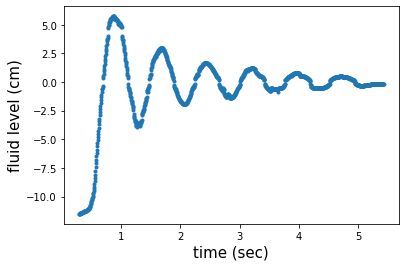

In [28]:
# plotting the raw data
plt.plot(time_data_clean[8:],z_data_clean[8:],'.')
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('fluid level (cm)',fontsize=15)
plt.show()

Now we would need to fill in some constants in each trial to calculate the initial condition of the fluid in the straw.

In [29]:
# calculate the initial starting level of the fluid in the submersed straw:
density = 1 # g/cm^3
atmPressure = 1030 # g/cm^2
h = 10 # cm
H = 20  # length of straw, cm
d = (1 - atmPressure/(density*h + atmPressure))*H
print('fluid level will be %2.2f cm above the bottom of the straw'%(d))

fluid level will be 0.19 cm above the bottom of the straw


In [30]:
# Solving the Newton's law model and also equations 17a and 17b from Lorenceau paper:


# Newton's law model
def DZ_dt_Newton(Z, t,args):
    h = args[0]
    g = args[1]
    b = args[2]
    return [Z[1], -Z[1]**2/Z[0] - g +g*h/Z[0] -b*Z[1]/Z[0] ]

# Lorenceau model:
def DZ_dt_Lor(Z, t,args):
    h = args[0]
    g = args[1]
    Omeg = args[3]
    if Z[1]>0:
        return [Z[1], 1/Z[0] - 1 -Omeg*Z[1] - (Z[1])**2/Z[0]]
    else:
        return [Z[1], 1/Z[0] - 1 -Omeg*Z[1] ]


def plot_osc(h=10.0, g=9.8e2,b = 23,factor=2.60):

    # prepare data for plotting:
    z_data1 = z_data_clean[8:]+h # change the overall level so that bottom of straw is z=0
    time_axis1 = time_data_clean[8:]  # only include data for positive times (after cap is released)
    
    # prepare parameters for solving models:
    Omeg = 0.062*factor
    params = (h,g,b,Omeg)    
    
    # solve Newton model:
    t_soln = time_axis1
    Z_soln_Newton = sp.integrate.odeint(DZ_dt_Newton, [0.02, 0], t_soln, args=(params,))   

    z_soln_Newton = Z_soln_Newton[:,0]      # fluid height
#     ydot_soln_Newton = Y_soln_Newton[:,1]   # fluid velocity

    # solve Lorenceau model, equation 17a and 17b....
    t_solnLor = np.arange(0, 30, 0.01)
    Z_soln_Lor = sp.integrate.odeint(DZ_dt_Lor, [0.02, 0.00], t_solnLor, args=(params,))   
    
    z_soln_Lor = Z_soln_Lor[:,0]*h       # fluid height

    Omeg = 0.062*factor
    params = (h,g,b,Omeg)

    plt.clf()
    plt.plot(time_axis1,z_data1,'b.',label='Data') 
    plt.plot(t_soln,z_soln_Newton,'r',label='Newtonian model')

    plt.xlabel('time (sec)',fontsize=15)
    plt.ylabel('fluid level (cm)',fontsize=15)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    plt.plot(t_solnLor*(h*1e-2/9.8)**0.5,z_soln_Lor,'g--',label='Lorenceau model')
    plt.title('Fluid level oscillations with both models\nOmega=%2.2e (no unit), h=%2.2f, b=%2.2e\nfilename = %s'%(Omeg,h,b,filename),fontsize=15)
    plt.legend(frameon=False,loc=1)
    plt.xlim([-0.2,3])
    plt.grid()
#     plt.savefig('fluid oscillation with fits.png',dpi=400)
    plt.show()
   

interact(plot_osc, h=(0.0, 20.0),g=(5.0e2, 15.0e2),b=(0.0, 30.0));


interactive(children=(FloatSlider(value=10.0, description='h', max=20.0), FloatSlider(value=980.0, description…